<a href="https://colab.research.google.com/github/YunJuyoung1913790/SMU_ITB2022/blob/main/ITB%EA%B3%BC%EC%A0%9C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 파일 불러오기 전 엑셀 데이터 전처리

1. health_data 복사본 'health_copy'생성



2. 필요한 변수만 남기고 모두 삭제
*   가입자일련번호, 성별코드, 연령대코드, AST, ALT, 감마지티피, 흡연상태를 제외한 변수 삭제



3. 분석하고자 하는 것
*   흡연자의 성별 및 연령 분석
*   흡연자와 금연자(예전에는 흡연하였으나 현재 금연)의 간 기능(AST,ALT)비교
*   흡연자와 금연자의 간 수치 비교

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# csv 데이터 가져오기
health = pd.read_csv("/content/drive/My Drive/ITB/Colab Notebooks/health_copy.csv")

display(health.head(10)) # 처음 10행 확인
print(health.info())     # 10000행의 데이터

,가입자일련번호,성별코드,연령대코드,AST,ALT,감마지티피,흡연상태
0,1,M,9,21.0,27.0,21.0,No
1,2,F,13,18.0,15.0,15.0,No
2,3,F,12,27.0,25.0,7.0,No
3,4,M,13,65.0,97.0,72.0,No
4,5,F,12,18.0,17.0,14.0,No
5,6,M,9,25.0,32.0,26.0,Yes
6,7,M,9,18.0,20.0,35.0,Yes
7,8,M,13,18.0,17.0,19.0,Yes
8,9,F,17,42.0,48.0,39.0,No
9,10,F,14,22.0,11.0,10.0,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   가입자일련번호  10000 non-null  int64  
 1   성별코드     10000 non-null  object 
 2   연령대코드    10000 non-null  int64  
 3   AST      9912 non-null   float64
 4   ALT      9912 non-null   float64
 5   감마지티피    9912 non-null   float64
 6   흡연상태     9998 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 547.0+ KB
None


감마지티피의 정상 수치는 남성 11-63IU/L, 여성 8-35IU/L이다. 따라서 감마지티피가 100이상인 경우, 이상치로 판단하고 해당 사례(639개)를 제거한다.

In [3]:
# 감마지티피 이상치 제거
health = health[health['감마지티피'] < 100]
print(health.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9361 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   가입자일련번호  9361 non-null   int64  
 1   성별코드     9361 non-null   object 
 2   연령대코드    9361 non-null   int64  
 3   AST      9361 non-null   float64
 4   ALT      9361 non-null   float64
 5   감마지티피    9361 non-null   float64
 6   흡연상태     9359 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 585.1+ KB
None


## 데이터 분석 실시

금연자(흡연상태=NotNow)와 흡연자(흡연상태=Yes)를 구분하여 데이터 분석을 실시한다. 흡연자와 미흡연자가 아닌, 흡연자와 금연자를 비교하는 것은 금연의 효과를 도출하고, 이를 금연 캠페인 및 기타 공익광고를 위한 정보로 활용하기 위함이다.

In [4]:
# 금연자 데이터프레임 추출
smokenn = health[(health['흡연상태']=='NotNow')]
display(smokenn.head(10))
# 흡연자 데이터프레임 추출
smoke = health[(health['흡연상태']=='Yes')]
display(smoke.head(10))

,가입자일련번호,성별코드,연령대코드,AST,ALT,감마지티피,흡연상태
26,27,M,11,37.0,29.0,20.0,NotNow
28,29,M,11,19.0,20.0,29.0,NotNow
37,38,M,9,27.0,30.0,25.0,NotNow
40,41,M,12,24.0,21.0,14.0,NotNow
44,45,M,12,15.0,13.0,18.0,NotNow
46,47,M,11,23.0,28.0,24.0,NotNow
72,73,M,15,17.0,17.0,15.0,NotNow
73,74,F,12,23.0,18.0,29.0,NotNow
89,90,M,9,26.0,33.0,54.0,NotNow
90,91,M,13,24.0,31.0,22.0,NotNow


,가입자일련번호,성별코드,연령대코드,AST,ALT,감마지티피,흡연상태
5,6,M,9,25.0,32.0,26.0,Yes
6,7,M,9,18.0,20.0,35.0,Yes
7,8,M,13,18.0,17.0,19.0,Yes
11,12,F,11,31.0,23.0,24.0,Yes
12,13,M,14,21.0,21.0,41.0,Yes
15,16,M,10,23.0,26.0,48.0,Yes
18,19,M,10,17.0,18.0,76.0,Yes
23,24,M,10,129.0,147.0,57.0,Yes
32,33,F,9,25.0,20.0,13.0,Yes
41,42,F,9,15.0,9.0,15.0,Yes


In [5]:
#흡연자 연령대 및 성별 분석
#흡연자 연령대별로 묶기
smoke_age = smoke.groupby('연령대코드')
display(smoke_age.first())
smoke_age1 = smoke_age.size() #연령대 별 인원수 파악
smoke_age1
#흡연자 성별로 묶기
smoke_gender = smoke.groupby('성별코드')
display(smoke_gender.first())
smoke_g1 = smoke_gender.size() #성별 별 인원수 파악
smoke_g1

,가입자일련번호,성별코드,AST,ALT,감마지티피,흡연상태
연령대코드,,,,,,
9,6,M,25.0,32.0,26.0,Yes
10,16,M,23.0,26.0,48.0,Yes
11,12,F,31.0,23.0,24.0,Yes
12,266,M,18.0,16.0,18.0,Yes
13,8,M,18.0,17.0,19.0,Yes
14,13,M,21.0,21.0,41.0,Yes
15,113,F,13.0,17.0,16.0,Yes
16,415,M,16.0,16.0,17.0,Yes
17,453,M,39.0,44.0,90.0,Yes


,가입자일련번호,연령대코드,AST,ALT,감마지티피,흡연상태
성별코드,,,,,,
F,12,11,31.0,23.0,24.0,Yes
M,6,9,25.0,32.0,26.0,Yes


성별코드
F     116
M    1480
dtype: int64

In [6]:
#matplotlib 활용해서 산점도 그래프 그리기

%matplotlib inline
import matplotlib as mpl               # 기본 설정
import matplotlib.pyplot as plt        # 그래프 관련
import matplotlib.font_manager as fm   # 폰트 관련
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 부호가 깨지는 것 방지

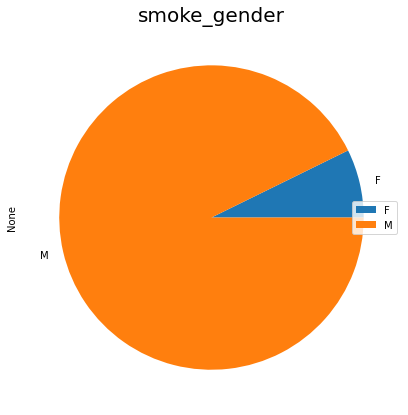

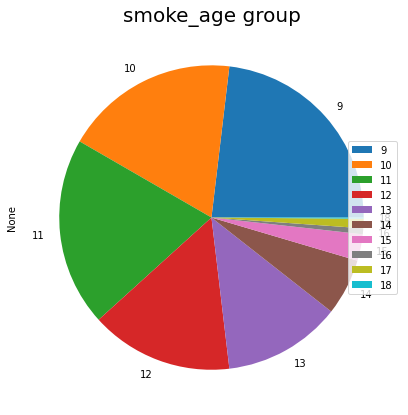

In [7]:
#흡연자의 성별 분포를 알아보는 파이차트 만들기
smoke_g1.plot(kind='pie', figsize=(7,7))
plt.title('smoke_gender', size = 20)
plt.legend(smoke_g1.index, loc = 'right')
plt.show()
#흡연자의 연령대를 알아보는 파이차트 만들기
smoke_age1.plot(kind='pie', figsize=(7,7))
plt.title('smoke_age group', size = 20)
plt.legend(smoke_age1.index, loc = 'right')
plt.show()

흡연자의 성별 분석 결과, 남성이 여성에 비해 압도적으로 많은 인원수를 차지하는 것으로 나타났다. 그리고 이어진 연령 분석 결과, 40대(9,10)와 50대초반(11)이 특히 흡연율이 높은 것으로 드러났다.

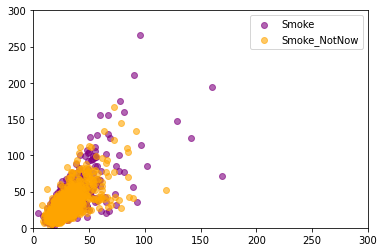

In [8]:
# 흡연자와 금연자의 간악화 수치 산점도 그래프
plt.scatter(smoke['AST'], smoke['ALT'], color = 'purple', alpha = 0.6, label = 'Smoke')
plt.scatter(smokenn['AST'], smokenn['ALT'], color = 'orange', alpha = 0.6, label = 'Smoke_NotNow')
plt.axis([0, 300, 0,300])
plt.legend()

간손상 수치를 나타내는 AST와 ALT를 함께 살펴본 결과, 흡연자의 간손상 수치가 금연자의 간손상 수치보다 더 높게 나타났다. 이는 흡연이 간의 기능을 악화시키며 흡연자가 금연을 하는 경우에는 간의 기능이 개선될 수 있음을 시사한다.

In [9]:
# 흡연자와 금연자 연령대별 감마지티피 추이 비교
# 흡연자를 연령대별로 묶은 새로운 df생성
smoke_age.first()
smoke_a = pd.DataFrame(smoke_age.first())
# '연령대코드' 변수 추가
smoke_a.insert(0,'연령대변수', ['9','10','11','12','13','14','15','16','17','18'])
display(smoke_a.head(10))


,연령대변수,가입자일련번호,성별코드,AST,ALT,감마지티피,흡연상태
연령대코드,,,,,,,
9,9,6,M,25.0,32.0,26.0,Yes
10,10,16,M,23.0,26.0,48.0,Yes
11,11,12,F,31.0,23.0,24.0,Yes
12,12,266,M,18.0,16.0,18.0,Yes
13,13,8,M,18.0,17.0,19.0,Yes
14,14,13,M,21.0,21.0,41.0,Yes
15,15,113,F,13.0,17.0,16.0,Yes
16,16,415,M,16.0,16.0,17.0,Yes
17,17,453,M,39.0,44.0,90.0,Yes


In [10]:
# 금연자 연령대별로 묶기
smokenn_age = smokenn.groupby('연령대코드')
smokenn_age.first()
# 금연자 연령대별로 묶은 새로운 df생성
smokenn_a = pd.DataFrame(smokenn_age.first())
# '연령대코드' 변수 추가
smokenn_a.insert(0,'연령대변수', ['9','10','11','12','13','14','15','16','17','18'])
display(smokenn_a.head(10))

,연령대변수,가입자일련번호,성별코드,AST,ALT,감마지티피,흡연상태
연령대코드,,,,,,,
9,9,38,M,27.0,30.0,25.0,NotNow
10,10,191,M,21.0,21.0,32.0,NotNow
11,11,27,M,37.0,29.0,20.0,NotNow
12,12,41,M,24.0,21.0,14.0,NotNow
13,13,91,M,24.0,31.0,22.0,NotNow
14,14,106,M,35.0,45.0,29.0,NotNow
15,15,73,M,17.0,17.0,15.0,NotNow
16,16,722,M,17.0,14.0,36.0,NotNow
17,17,488,M,16.0,10.0,31.0,NotNow


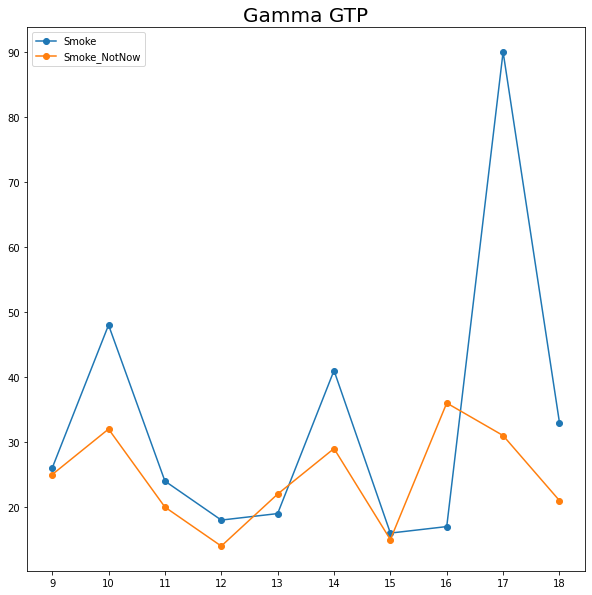

In [11]:
# 흡연자와 금연자의 감마지티피 비교
fig = plt.figure(figsize =(10,10))
fig.set_facecolor('white')
ax = fig.add_subplot()
ax.plot(smoke_a['연령대변수'], smoke_a['감마지티피'], marker='o',markersize=6, label='Smoke')
ax.plot(smokenn_a['연령대변수'], smokenn_a['감마지티피'], marker='o',markersize=6, label='Smoke_NotNow')
plt.title('Gamma GTP', fontsize = 20)
ax.legend() 
plt.show()

흡연자의 감마지티피는 금연자의 감마지티피보다 대체로 높은 값을 갖는다. 앞선 '흡연 집단 연령분석'에서 상당비율을 차지한 40대 후반(연령대코드:10)의 감마지티피 값이 정상치인 남성 11-63IU/L와 여성 8-35IU/L의 상한선에 가깝거나 혹은 초과한다는 사실에 미루어 봤을 때 흡연자는 간염에 걸릴 위험이 높음을 알 수 있다.

## 인사이트 도출

흡연자와 금연자의 간 기능에는 유의미한 차이가 존재한다. 이는 흡연자가 금연을 하는 경우, 훨씬 더 나은 건강상태를 유지할 수 있음을 암시한다.

위의 분석을 종합해보면, 전체적인 흡연율을 낮추기 위해서는 흡연율이 높은 40대-50대 초반 남성을 대상으로 한 공익광고 및 금연 캠페인을 확대해야 한다. 또한 흡연이 폐 뿐만 아니라 간에도 좋지 않다는 사실을 알리고, 실제 흡연자가 금연을 하는 경우에 개선될 수 있는 여러 효과들(AST,ALT수치 개선, 간염예방)을 제시하여 흡연자에게 금연 의지를 심어주어야 한다.